## Capstone Project - The Battle of Neighborhoods: ATHENS

### Step 1: Acquire the names of the Neighborhoods and their coordinates

In [1]:
import pandas as pd 
import numpy as np 
from bs4 import BeautifulSoup
import requests
from geopy.geocoders import Nominatim
from helpers import *
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
sns.set_style('whitegrid')

%matplotlib inline
print('libraries imported')

libraries imported


For this project, we need to acquire the names of the neighbourhoods in Athens. The following wikipedia link [[1]](https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Athens) contains the name of each neighborhood, hence it will be used.

In [2]:
url = 'https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Athens'

To get the names we need to extract the data from the webpage using BeautifulSoup 

In [3]:
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
# uncomment if you want to check the html tags
#print(soup.prettify()) 

In [4]:
neighborhoods_names= []
for div in soup.findAll('div', attrs={'class':"mw-category"}):
    for a in div.findAll('a'):
         neighborhoods_names.append(a.get('title'))


In [5]:
neighborhood_names = neighborhoods_names[:-1]

Now we acquired the list of the names for each neighborhood

In [6]:
neighborhood_names

['Aerides, Athens',
 'Agios Eleftherios, Athens',
 'Agios Panteleimonas, Athens',
 'Akadimia Platonos',
 'Akadimia, Athens',
 'Ampelokipoi, Athens',
 'Anafiotika',
 'Ano Petralona',
 'Asteroskopeio',
 'Asyrmatos, Athens',
 'Attiki, Athens',
 'Elaionas',
 'Ellinoroson',
 'Erythros Stavros',
 'Evangelismos, Athens',
 'Exarcheia',
 'Gazi, Athens',
 'Girokomeio, Athens',
 'Goudi',
 'Gouva, Athens',
 'Gyzi',
 'Ilisia, Athens',
 'Kallimarmaro',
 'Kallimarmaro, Athens',
 'Kerameikos',
 'Kolokynthou',
 'Kolonaki',
 'Kolonos',
 'Koukaki',
 'Kountouriotika',
 'Kynosargous',
 'Kypriadou',
 'Kypseli, Athens',
 'Makrygianni, Athens',
 'Metaxourgeio',
 'Mets, Athens',
 'Monastiraki',
 'Mount Lycabettus',
 'Nea Filothei',
 'Neapoli, Athens',
 'Neos Kosmos, Athens',
 'Omonoia, Athens',
 'Pangrati',
 'Patisia',
 'Pedion tou Areos',
 'Petralona',
 'Philopappou',
 'Plaka',
 'Polygono, Athens',
 'Probonas',
 'Profitis Daniil, Athens',
 'Profitis Ilias, Athens',
 'Psyri',
 'Rizoupoli',
 'Rouf, Athens',
 'S

Some of the names need to be corrected because Nomitim won't be able to find them.

In [7]:
names_reformed = {'Ampelokipoi, Athens':'Ampelokipi, Athens',
                   'Erythros Stavros':'Erithros Stavros, Athens',
                  'Girokomeio, Athens':'Girokomio, Athens',
                  'Kynosargous':'Kinosargous, Athens',
                   'Kypriadou':'Kipriadou, Athens', 
                    'Probonas': 'Prompona, Athens',
                   'Profitis Daniil, Athens': 'Profitis Daniil, Athens ',
                  'Psyri':'Psirri, Athens', 
                  'Rizoupoli':'Rizoupoli, Athens', 
                  'Thymarakia':'Thimarakia, Athens',
                   'Vathi, Athens':'Platia Vathis, Athens',
                  'Monastiraki':'Monastiraki, Athens',
                  'Pedion tou Areos':'Pedion Areos',
                 'Neapoli, Athens': 'Neapoli, Athens'}

In [8]:
for key in names_reformed:
       for i,j in enumerate(neighborhood_names):
            if key in j:
                   neighborhood_names[i] = names_reformed[key]
    

In [9]:
neighborhood_names

['Aerides, Athens',
 'Agios Eleftherios, Athens',
 'Agios Panteleimonas, Athens',
 'Akadimia Platonos',
 'Akadimia, Athens',
 'Ampelokipi, Athens',
 'Anafiotika',
 'Ano Petralona',
 'Asteroskopeio',
 'Asyrmatos, Athens',
 'Attiki, Athens',
 'Elaionas',
 'Ellinoroson',
 'Erithros Stavros, Athens',
 'Evangelismos, Athens',
 'Exarcheia',
 'Gazi, Athens',
 'Girokomio, Athens',
 'Goudi',
 'Gouva, Athens',
 'Gyzi',
 'Ilisia, Athens',
 'Kallimarmaro',
 'Kallimarmaro, Athens',
 'Kerameikos',
 'Kolokynthou',
 'Kolonaki',
 'Kolonos',
 'Koukaki',
 'Kountouriotika',
 'Kinosargous, Athens',
 'Kipriadou, Athens',
 'Kypseli, Athens',
 'Makrygianni, Athens',
 'Metaxourgeio',
 'Mets, Athens',
 'Monastiraki, Athens',
 'Mount Lycabettus',
 'Nea Filothei',
 'Neapoli, Athens',
 'Neos Kosmos, Athens',
 'Omonoia, Athens',
 'Pangrati',
 'Patisia',
 'Pedion Areos',
 'Petralona',
 'Philopappou',
 'Plaka',
 'Polygono, Athens',
 'Prompona, Athens',
 'Profitis Daniil, Athens ',
 'Profitis Ilias, Athens',
 'Psirri,

The next step is to find the latitude and longitude of the Neighborhoods using geopy Nominatim service 

In [10]:
#iniciate the service 
geolocator = Nominatim(user_agent="my-app")

In [11]:
coordinates = {'Neighborhood':neighborhood_names, 'Latitude':[], 'Longitude':[]}

coordinates = find_coordinates(geolocator, coordinates)

not found
found
found
found
found
found
found
found
found
not found
found
found
found
not found
found
found
found
not found
found
found
found
found
found
found
found
found
found
found
found
found
not found
not found
found
found
found
found
found
found
found
not found
found
found
found
found
found
found
found
found
found
found
not found
found
found
not found
found
found
found
found
not found
found
not found
found


It seems that the service still was not able to find all the coordinates. 

In [12]:
df = pd.DataFrame(coordinates)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  62 non-null     object 
 1   Latitude      51 non-null     float64
 2   Longitude     51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [14]:
print('The number of NaN values are {}'.format(len(df[df['Latitude'].isna() == True])
))

The number of NaN values are 11


In [15]:
#check the names that are nan 
df[df['Latitude'].isna() == True]['Neighborhood']

0              Aerides, Athens
9            Asyrmatos, Athens
13    Erithros Stavros, Athens
17           Girokomio, Athens
30         Kinosargous, Athens
31           Kipriadou, Athens
39             Neapoli, Athens
50    Profitis Daniil, Athens 
53           Rizoupoli, Athens
58          Thimarakia, Athens
60       Platia Vathis, Athens
Name: Neighborhood, dtype: object

Above I checked the names of the neighborhoods that Nominatim was not able to find.

Therefore, i manually found the coordinates for the ones that I consider important and droped the others.

In [16]:
#Neapoli
df.loc[39,'Latitude']= 37.985326
df.loc[39,'Longitude'] = 23.741638

#Rizoupoli
df.loc[53,'Latitude']= 38.028201
df.loc[53,'Longitude'] = 23.740081

In [18]:
df.dropna(inplace = True)

In [19]:
df['City'] = 'Athens'
df['Region']= 'Attica'
df.head()

,Neighborhood,Latitude,Longitude,City,Region
1,"Agios Eleftherios, Athens",38.020044,23.731724,Athens,Attica
2,"Agios Panteleimonas, Athens",37.996564,23.726957,Athens,Attica
3,Akadimia Platonos,37.989357,23.711217,Athens,Attica
4,"Akadimia, Athens",37.980424,23.734762,Athens,Attica
5,"Ampelokipi, Athens",37.986893,23.763535,Athens,Attica


In [20]:
print('The number of neighborhoods in athens that we gathered are {}'.format(df.shape[0]))

The number of neighborhoods in athens that we gathered are 53


In [21]:
# uncomment the following line if you want to save the dataframe to csv for later use
#df.to_csv('data/Athens_Neighborhoods.csv',index =False)

### Step 2: Collect the dataset of the venues

To acquire the venues you need to have a Client_id and a Client_secret to access foursquare api 

In [2]:
df = pd.read_csv('data/Athens_Neighborhoods.csv')

In [13]:
df.drop(df[df['Neighborhood']== 'Attiki, Athens'].index,inplace= True)

In [74]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100# A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


The first step is to define the values radius for the search of venues from the foursquare API

In [17]:
#the coordinates of athens
lat = 37.9839412
lon = 23.7283052
#define the radius check the plot to see what could work
radius= 250
plot_radius(lat,lon,df,radius)

In [18]:
athens_venues = getNearbyVenues(df['Neighborhood'],
                                df['Latitude'],
                                df['Longitude'],
                                radius, 
                                CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT)

Agios Eleftherios, Athens
Agios Panteleimonas, Athens
Akadimia Platonos
Akadimia, Athens
Ampelokipi, Athens
Anafiotika
Ano Petralona
Asteroskopeio
Elaionas
Ellinoroson
Evangelismos, Athens
Exarcheia
Gazi, Athens
Goudi
Gouva, Athens
Gyzi
Ilisia, Athens
Kallimarmaro
Kallimarmaro, Athens
Kerameikos
Kolokynthou
Kolonaki
Kolonos
Koukaki
Kountouriotika
Kypseli, Athens
Makrygianni, Athens
Metaxourgeio
Mets, Athens
Monastiraki, Athens
Mount Lycabettus
Nea Filothei
Neapoli, Athens
Neos Kosmos, Athens
Omonoia, Athens
Pangrati
Patisia
Pedion Areos
Petralona
Philopappou
Plaka
Polygono, Athens
Prompona, Athens
Profitis Ilias, Athens
Psirri, Athens
Rizoupoli, Athens
Rouf, Athens
Sepolia
Skouze Hill
Thiseio
Treis Gefyres
Votanikos


In [19]:
athens_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Agios Eleftherios, Athens",38.020044,23.731724,Κοσμικόν,38.019532,23.731832,Dessert Shop
1,"Agios Eleftherios, Athens",38.020044,23.731724,Coffee Island,38.020038,23.731612,Coffee Shop
2,"Agios Eleftherios, Athens",38.020044,23.731724,Το Μανταλάκι,38.020443,23.732895,Kafenio
3,"Agios Eleftherios, Athens",38.020044,23.731724,Το Πεϊνιρλί της Πόλης,38.019398,23.731205,Snack Place
4,"Agios Eleftherios, Athens",38.020044,23.731724,Pap Liber,38.018727,23.733803,Dessert Shop


### Step 3: Data preprossesing 

Check the returned dataset

In [32]:
grouped_data = athens_venues.groupby('Neighborhood').count().reset_index()[['Venue','Neighborhood']]

In [33]:
grouped_data

,Venue,Neighborhood
0,14,"Agios Eleftherios, Athens"
1,17,"Akadimia, Athens"
2,28,"Ampelokipi, Athens"
3,27,Anafiotika
4,29,Ano Petralona
5,29,Asteroskopeio
6,13,Ellinoroson
7,20,Exarcheia
8,11,"Ilisia, Athens"
9,23,Kerameikos


Since we there are a lot of neighborhouds that have returned bellow 10 venues, i decided to exclude them from the clustering analysis 

In [25]:
grouped_data['Venue'].median()

14.0

In [26]:
grouped_data = grouped_data[grouped_data['Venue'] >= 10]

<AxesSubplot:xlabel='Neighborhood', ylabel='Venue'>

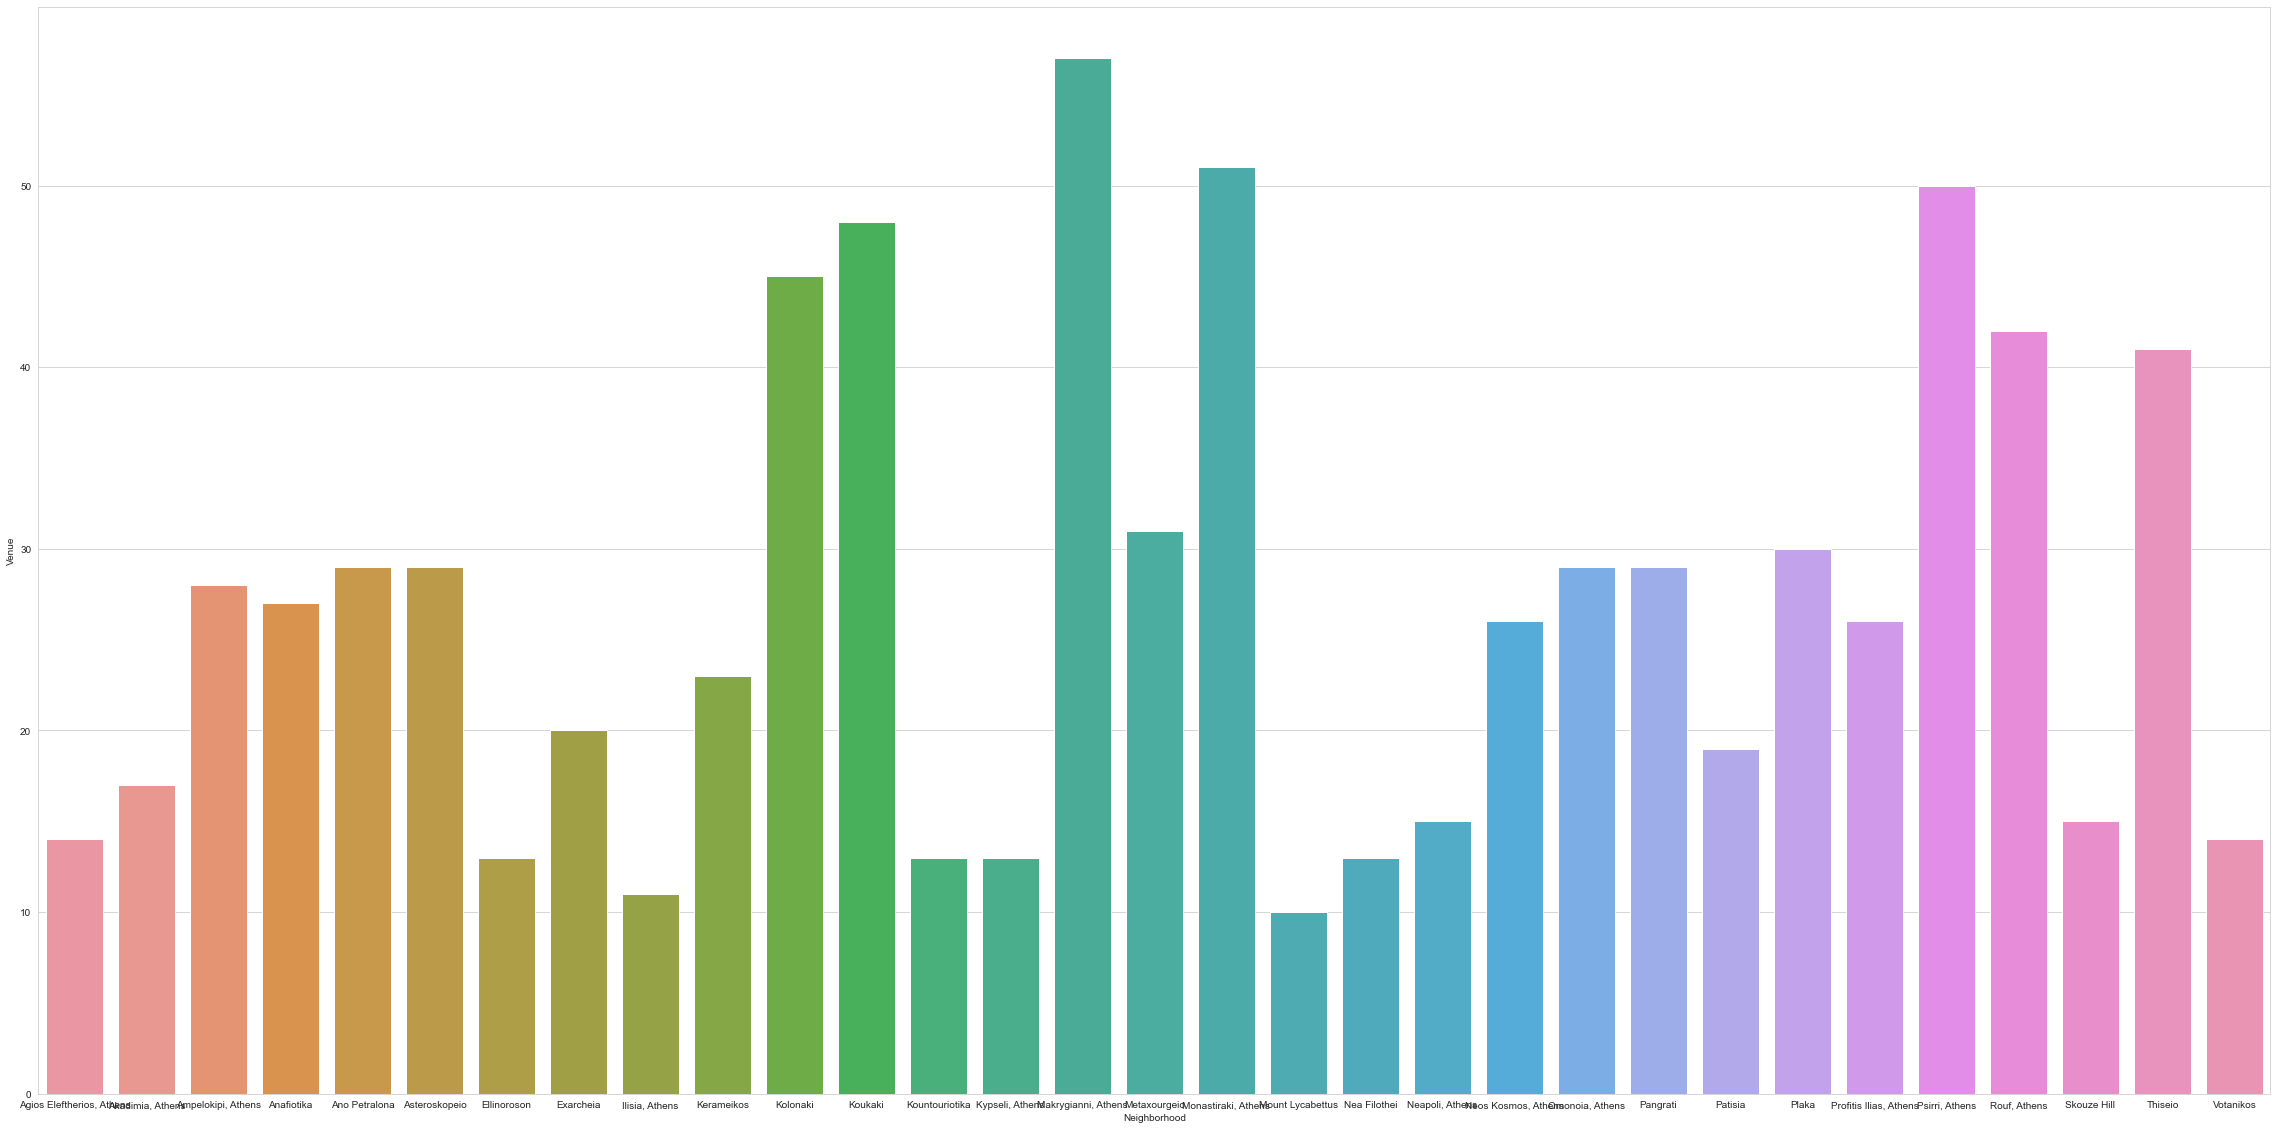

In [27]:
plt.figure(figsize=(40,20))
sns.barplot(data=grouped_data, x="Neighborhood", y="Venue")

In [34]:
athens_venues['label'] = athens_venues['Neighborhood'].apply(lambda x : 1 if any(i in x for i in grouped_data['Neighborhood']) else 0)

In [35]:
athens_venues = athens_venues[athens_venues['label']==1]

In [36]:
athens_venues.drop(['label'], axis=1, inplace= True)

<AxesSubplot:>

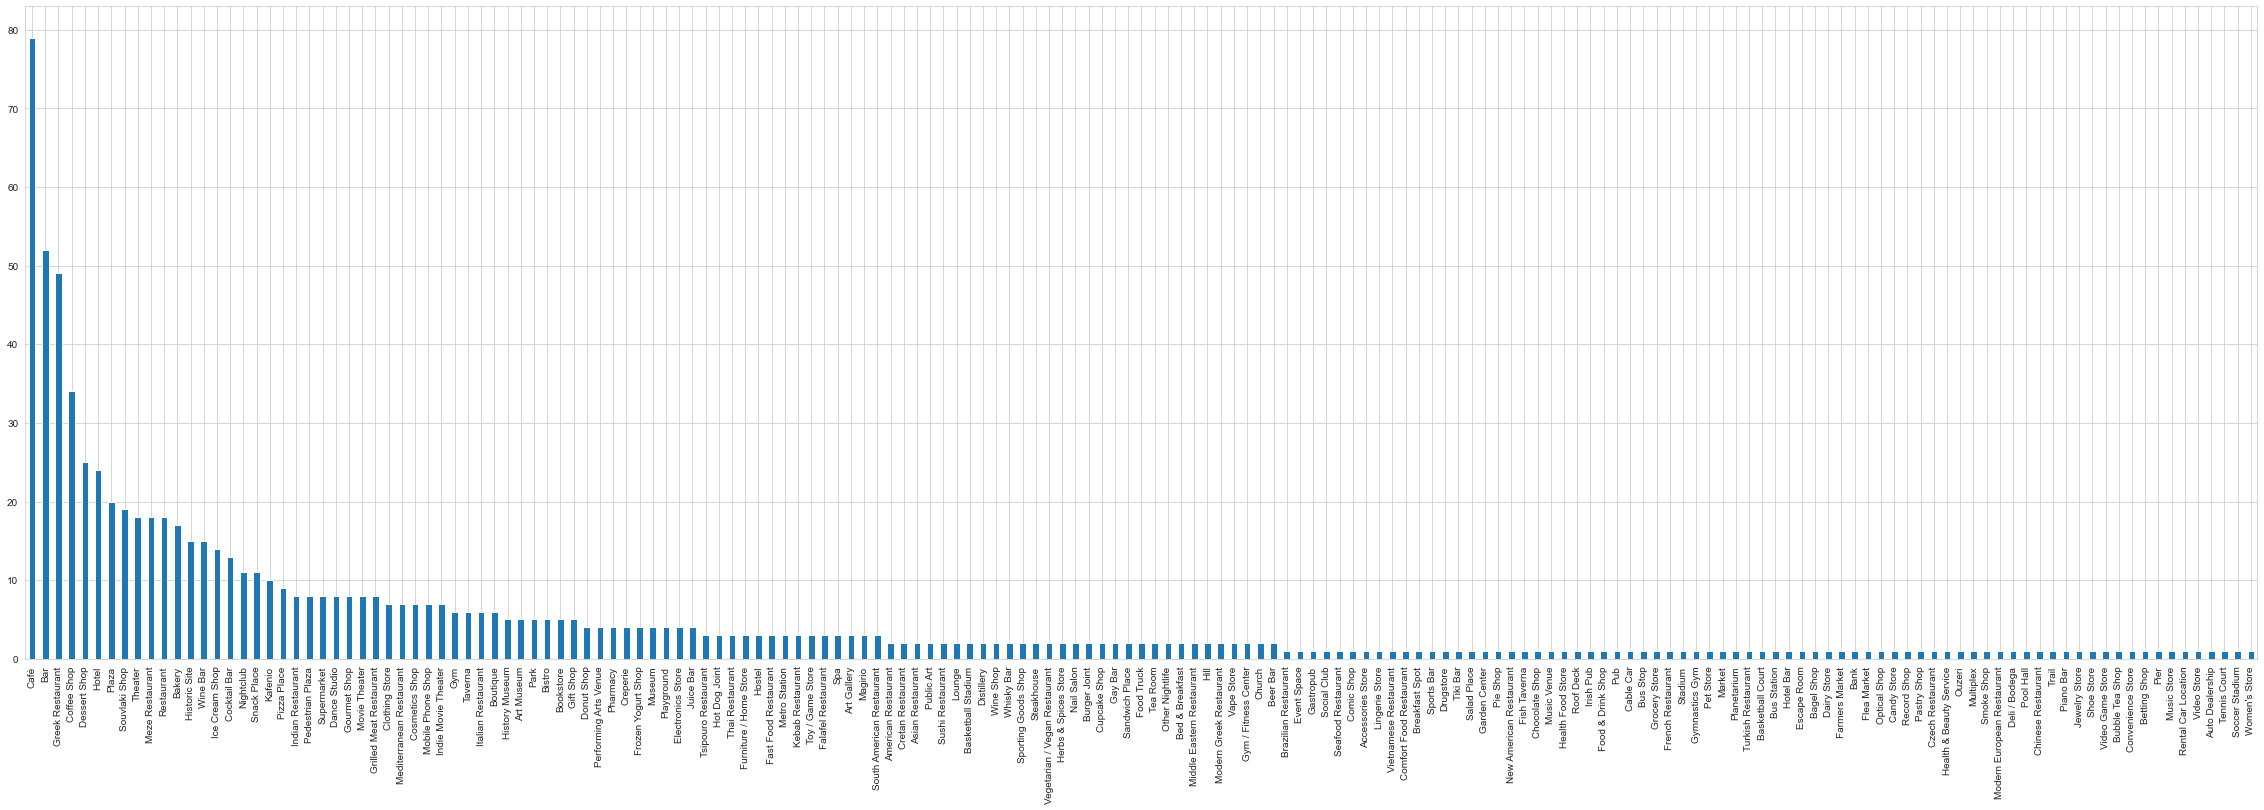

In [37]:
plt.figure(figsize=(40,12))
athens_venues['Venue Category'].value_counts().plot(kind='bar')

Since our target group are mainly tourists i decide to filter out some of the venues categories

In [46]:
list_of_categories = ['store', 'movie', 'shop', 'salon', 'plaza', 'playground', 'station','metro','market', 'sports','stadium','boutique', 'court']

In [39]:
athens_venues['labels']= athens_venues['Venue Category'].apply(lambda x: 1 if any(i in x.lower() for i in list_of_categories) else 0)

In [41]:
athens_venues = athens_venues[athens_venues['labels']==0].reset_index(drop= True)

In [42]:
athens_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,labels
0,"Agios Eleftherios, Athens",38.020044,23.731724,Το Μανταλάκι,38.020443,23.732895,Kafenio,0
1,"Agios Eleftherios, Athens",38.020044,23.731724,Το Πεϊνιρλί της Πόλης,38.019398,23.731205,Snack Place,0
2,"Agios Eleftherios, Athens",38.020044,23.731724,Latica,38.019197,23.729185,Café,0
3,"Agios Eleftherios, Athens",38.020044,23.731724,Το Παραδοσιακό,38.021094,23.731909,Bakery,0
4,"Agios Eleftherios, Athens",38.020044,23.731724,Η Συνάντηση,38.019689,23.730404,Kafenio,0


In [43]:
#athens_venues.to_csv('data/venues_athens.csv', index= False)

### Clustering the cities of Attica based on their popular venues

In [44]:
#Venue Category column is important therefore we have to discretise the data of the column to new features 

athens_dummies = pd.get_dummies(athens_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
athens_dummies['Neighborhood'] = athens_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [athens_dummies.columns[-1]] + list(athens_dummies.columns[:-1])
attica_dummies = athens_dummies[fixed_columns]

athens_dummies.head()

,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Dealership,Bakery,Bank,Bar,Basketball Court,Bed & Breakfast,...,Theater,Tiki Bar,Trail,Tsipouro Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Agios Eleftherios, Athens"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Agios Eleftherios, Athens"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Agios Eleftherios, Athens"
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Agios Eleftherios, Athens"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Agios Eleftherios, Athens"


In [45]:
athens_grouped = athens_dummies.groupby('Neighborhood').mean().reset_index()
athens_grouped.head()

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Dealership,Bakery,Bank,Bar,Basketball Court,...,Thai Restaurant,Theater,Tiki Bar,Trail,Tsipouro Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,"Agios Eleftherios, Athens",0.000000,0.0,0.0,0.0,0.0,0.285714,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,"Akadimia, Athens",0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,"Ampelokipi, Athens",0.058824,0.0,0.0,0.0,0.0,0.117647,0.058824,0.000000,0.0,...,0.000000,0.058824,0.0,0.0,0.000000,0.0,0.0,0.058824,0.0,0.0
3,Anafiotika,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Ano Petralona,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.086957,0.0,...,0.043478,0.000000,0.0,0.0,0.086957,0.0,0.0,0.000000,0.0,0.0


In [47]:
#to use the data for our clustering model we need only numerical values
athens_grouped_clustering = athens_grouped.drop('Neighborhood', 1)

### Step 2: Apply Kmeans Clustering

The kmeans algorithm creates clusters of n observation into k clusters in which each observation belongs to the cluster with the nearest mean(cluster centroid).It tries to create clusters of equal variance with minimizing a criterion known as inertia. However, the algorithm requires the number of clusters to be specified beforehand. The question now is how to determine the optimal number of clusters for our dataset. In this notebook we will explore two possible ways that could provide an idea of the right choice of clusters.
- Silhouette Coefficient Score : shows the model with better defined clusters and is calculated by   b -a / max(a,b) where a is mean distance between a sample point and all aothers in the same class and b mean distance between a sample and all other points in the next nearest class.

- Elbow method : for the elbow method we have to calculate and visualize the values o inertia which is the sum of squared distances of samples to thei closest cluster center and select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion

In [48]:
K = range(2, 11)

for k in K:
    kmean = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmean.fit_predict(athens_grouped_clustering)
    silhouette_avg = silhouette_score(athens_grouped_clustering, cluster_labels)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 2 The average silhouette_score is : 0.07142446342654829
For k = 3 The average silhouette_score is : 0.07527284091854468
For k = 4 The average silhouette_score is : 0.026138473834062554
For k = 5 The average silhouette_score is : 0.07940181037017646
For k = 6 The average silhouette_score is : 0.07563898295740333
For k = 7 The average silhouette_score is : 0.07142925280881725
For k = 8 The average silhouette_score is : 0.06811628838159771
For k = 9 The average silhouette_score is : 0.08624507344493955
For k = 10 The average silhouette_score is : 0.04767116227490887


2 : 2.5122204348226163
3 : 2.267641419410027
4 : 2.1444744133447706
5 : 1.9240351168296002
6 : 1.8066255446157533
7 : 1.6890877078767113
8 : 1.5224606124810642
9 : 1.3843897652090402
10 : 1.3026569056645672


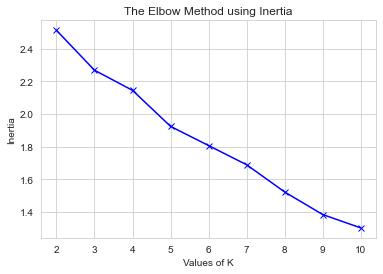

In [49]:
inertias = []

mapping2 = {}

for k in K:
        # Building and fitting the model
    kmean = KMeans(n_clusters=k, random_state=10).fit(athens_grouped_clustering)
    inertias.append(kmean.inertia_)
    mapping2[k] = kmean.inertia_


for key, val in mapping2.items():
        print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [50]:
number_of_clusters = 5
kmeans = KMeans(n_clusters=number_of_clusters, random_state=10).fit(athens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 3, 1, 2, 1, 0, 4, 0, 2])

In [51]:
top10_venues =create_most_common_dataset(10,athens_grouped)

In [52]:
top10_venues.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Agios Eleftherios, Athens",Kafenio,Bakery,Meze Restaurant,Snack Place,Café,Nightclub,Planetarium,Pizza Place,Pier,Piano Bar
1,"Akadimia, Athens",Café,Italian Restaurant,Theater,Steakhouse,Health & Beauty Service,Sushi Restaurant,Meze Restaurant,New American Restaurant,Pizza Place,Pier
2,"Ampelokipi, Athens",Bakery,Dance Studio,Café,American Restaurant,Theater,Multiplex,Hotel,Gym / Fitness Center,Gym,Snack Place
3,Anafiotika,Historic Site,Café,History Museum,Church,Taverna,Kafenio,Juice Bar,Other Nightlife,Distillery,Restaurant
4,Ano Petralona,Greek Restaurant,Meze Restaurant,Tsipouro Restaurant,Bar,Cocktail Bar,Steakhouse,Taverna,Café,Gastropub,Modern Greek Restaurant


In [53]:
top10_venues.insert(0, 'Cluster Labels', kmeans.labels_)


# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
athens_merged =df.join(top10_venues.set_index('Neighborhood'), on='Neighborhood')

athens_merged.head()

,Neighborhood,Latitude,Longitude,City,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Agios Eleftherios, Athens",38.020044,23.731724,Athens,Attica,3.0,Kafenio,Bakery,Meze Restaurant,Snack Place,Café,Nightclub,Planetarium,Pizza Place,Pier,Piano Bar
1,"Agios Panteleimonas, Athens",37.996564,23.726957,Athens,Attica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akadimia Platonos,37.989357,23.711217,Athens,Attica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Akadimia, Athens",37.980424,23.734762,Athens,Attica,1.0,Café,Italian Restaurant,Theater,Steakhouse,Health & Beauty Service,Sushi Restaurant,Meze Restaurant,New American Restaurant,Pizza Place,Pier
4,"Ampelokipi, Athens",37.986893,23.763535,Athens,Attica,3.0,Bakery,Dance Studio,Café,American Restaurant,Theater,Multiplex,Hotel,Gym / Fitness Center,Gym,Snack Place


In [54]:
athens_merged.dropna(inplace=True)
athens_merged['Cluster Labels'] = athens_merged['Cluster Labels'].apply(lambda x: int(x))

In [63]:
athens_merged.head()

,Neighborhood,Latitude,Longitude,City,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Agios Eleftherios, Athens",38.020044,23.731724,Athens,Attica,3,Kafenio,Bakery,Meze Restaurant,Snack Place,Café,Nightclub,Planetarium,Pizza Place,Pier,Piano Bar
3,"Akadimia, Athens",37.980424,23.734762,Athens,Attica,1,Café,Italian Restaurant,Theater,Steakhouse,Health & Beauty Service,Sushi Restaurant,Meze Restaurant,New American Restaurant,Pizza Place,Pier
4,"Ampelokipi, Athens",37.986893,23.763535,Athens,Attica,3,Bakery,Dance Studio,Café,American Restaurant,Theater,Multiplex,Hotel,Gym / Fitness Center,Gym,Snack Place
5,Anafiotika,37.972332,23.728258,Athens,Attica,1,Historic Site,Café,History Museum,Church,Taverna,Kafenio,Juice Bar,Other Nightlife,Distillery,Restaurant
6,Ano Petralona,37.970467,23.712938,Athens,Attica,2,Greek Restaurant,Meze Restaurant,Tsipouro Restaurant,Bar,Cocktail Bar,Steakhouse,Taverna,Café,Gastropub,Modern Greek Restaurant


### Step 3: Show The results

In [55]:
address = 'Athens, Greece'

geolocator = Nominatim(user_agent="my-app")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of athens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of athens are 37.9839412, 23.7283052.


In [57]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(number_of_clusters)
ys = [i + x + (i*x)**2 for i in range(number_of_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(athens_merged['Latitude'], athens_merged['Longitude'], athens_merged['Neighborhood'], athens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Text(0.5, 1.0, 'Number of neighbourhods in the same cluster')

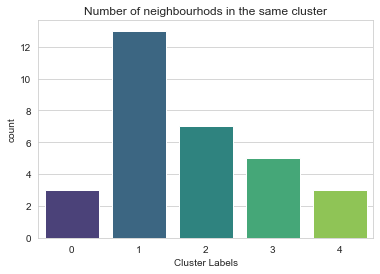

In [60]:
sns.countplot(x = athens_merged['Cluster Labels'], palette='viridis')
plt.title('Number of neighbourhods in the same cluster')

Text(0.5, 1.0, 'Number of cities in the same cluster')

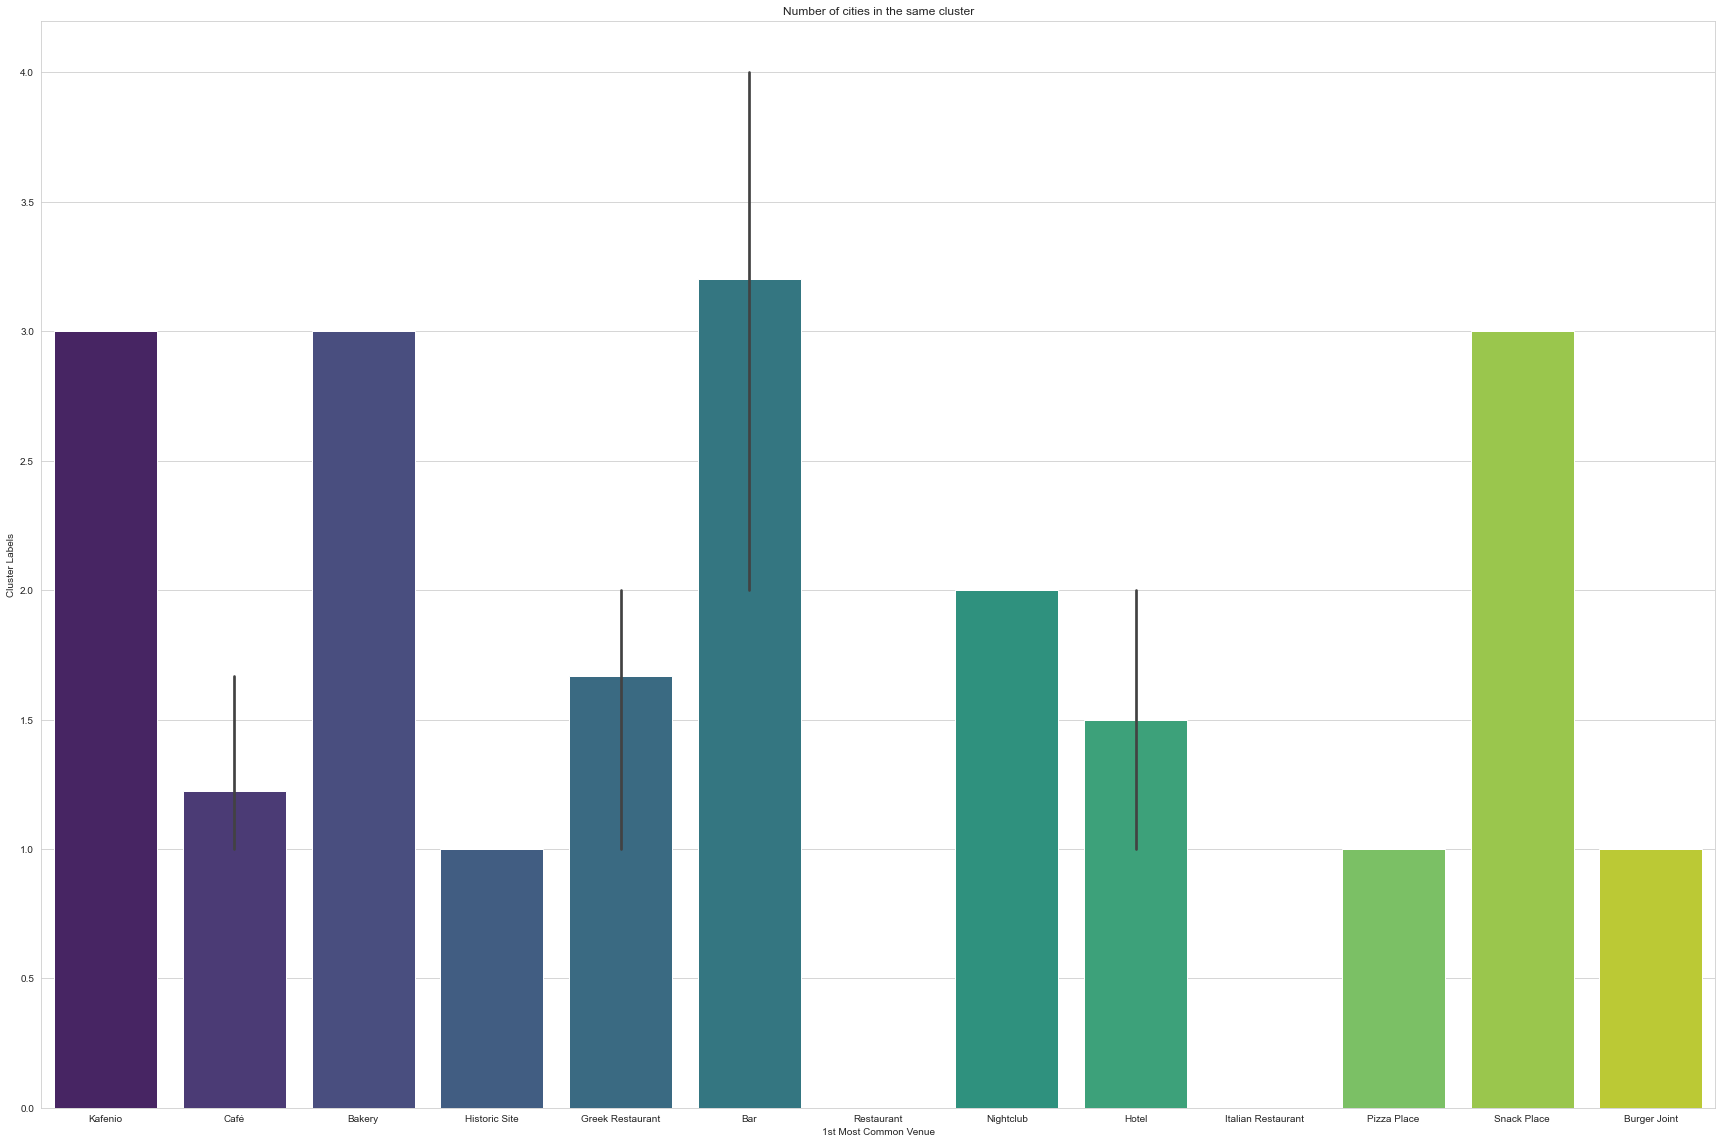

In [59]:
plt.figure(figsize=(30,20))
sns.barplot(x = athens_merged['1st Most Common Venue'],y= athens_merged['Cluster Labels'], palette='viridis')
plt.title('Number of cities in the same cluster')

In [65]:
athens_merged[athens_merged['Cluster Labels']==0].drop(['Latitude','Longitude','Cluster Labels'], axis=1)

,Neighborhood,City,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Ellinoroson,Athens,Attica,Greek Restaurant,Restaurant,Basketball Court,Cretan Restaurant,Gym,Café,Tennis Court,Sushi Restaurant,Modern Greek Restaurant,Multiplex
17,"Ilisia, Athens",Athens,Attica,Restaurant,Food Truck,Hotel,Piano Bar,Sandwich Place,Park,Brazilian Restaurant,Greek Restaurant,Grilled Meat Restaurant,American Restaurant
31,Mount Lycabettus,Athens,Attica,Italian Restaurant,Trail,Cable Car,Hill,Park,Meze Restaurant,Grilled Meat Restaurant,Hotel Bar,Mediterranean Restaurant,Whisky Bar


In [69]:
athens_merged[athens_merged['Cluster Labels']==1].drop(['Latitude','Longitude','Cluster Labels'], axis=1)

,Neighborhood,City,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Akadimia, Athens",Athens,Attica,Café,Italian Restaurant,Theater,Steakhouse,Health & Beauty Service,Sushi Restaurant,Meze Restaurant,New American Restaurant,Pizza Place,Pier
5,Anafiotika,Athens,Attica,Historic Site,Café,History Museum,Church,Taverna,Kafenio,Juice Bar,Other Nightlife,Distillery,Restaurant
7,Asteroskopeio,Athens,Attica,Café,Meze Restaurant,Greek Restaurant,Bar,Lounge,Historic Site,Pizza Place,Restaurant,South American Restaurant,Nightclub
22,Kolonaki,Athens,Attica,Café,Cocktail Bar,American Restaurant,Tea Room,Restaurant,Pizza Place,Museum,History Museum,Gym / Fitness Center,Grilled Meat Restaurant
24,Koukaki,Athens,Attica,Café,Meze Restaurant,Greek Restaurant,Bar,Kafenio,Pizza Place,Snack Place,Taverna,Wine Bar,Bed & Breakfast
25,Kountouriotika,Athens,Attica,Hotel,Café,Restaurant,Magirio,Modern European Restaurant,Seafood Restaurant,American Restaurant,Other Nightlife,Pizza Place,Pier
30,"Monastiraki, Athens",Athens,Attica,Café,Bar,Historic Site,Wine Bar,Indian Restaurant,History Museum,Falafel Restaurant,Pizza Place,Greek Restaurant,Performing Arts Venue
32,Nea Filothei,Athens,Attica,Pizza Place,Bakery,Pier,Park,Café,American Restaurant,Nightclub,Pool Hall,Planetarium,Piano Bar
33,"Neapoli, Athens",Athens,Attica,Café,Wine Bar,Bar,Theater,Greek Restaurant,Nightclub,Planetarium,Pizza Place,Pier,Piano Bar
41,Plaka,Athens,Attica,Café,Bar,Museum,Restaurant,Roof Deck,Greek Restaurant,Distillery,Historic Site,Church,Taverna


In [68]:
athens_merged[athens_merged['Cluster Labels']==2].drop(['Latitude','Longitude','Cluster Labels'], axis=1)

,Neighborhood,City,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Ano Petralona,Athens,Attica,Greek Restaurant,Meze Restaurant,Tsipouro Restaurant,Bar,Cocktail Bar,Steakhouse,Taverna,Café,Gastropub,Modern Greek Restaurant
20,Kerameikos,Athens,Attica,Nightclub,Greek Restaurant,Hotel,Event Space,Bistro,Historic Site,Performing Arts Venue,Café,Theater,Dance Studio
26,"Kypseli, Athens",Athens,Attica,Greek Restaurant,Fast Food Restaurant,Snack Place,Café,Ouzeri,American Restaurant,Pub,Planetarium,Pizza Place,Pier
27,"Makrygianni, Athens",Athens,Attica,Greek Restaurant,Café,Hotel,Wine Bar,Bistro,Hostel,Indian Restaurant,Juice Bar,Bar,Theater
35,"Omonoia, Athens",Athens,Attica,Hotel,Theater,Wine Bar,Café,Fish Taverna,Mediterranean Restaurant,Bakery,Pharmacy,Snack Place,Greek Restaurant
45,"Psirri, Athens",Athens,Attica,Greek Restaurant,Hotel,Bar,Grilled Meat Restaurant,Wine Bar,Restaurant,Escape Room,Falafel Restaurant,Public Art,Pizza Place
47,"Rouf, Athens",Athens,Attica,Greek Restaurant,Bar,Nightclub,Café,Restaurant,Dance Studio,Theater,Hot Dog Joint,Food Truck,Gay Bar


In [71]:
athens_merged[athens_merged['Cluster Labels']==3].drop(['Latitude','Longitude','Cluster Labels'], axis=1)

,Neighborhood,City,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Agios Eleftherios, Athens",Athens,Attica,Kafenio,Bakery,Meze Restaurant,Snack Place,Café,Nightclub,Planetarium,Pizza Place,Pier,Piano Bar
4,"Ampelokipi, Athens",Athens,Attica,Bakery,Dance Studio,Café,American Restaurant,Theater,Multiplex,Hotel,Gym / Fitness Center,Gym,Snack Place
34,"Neos Kosmos, Athens",Athens,Attica,Snack Place,Pharmacy,Bakery,Sandwich Place,Czech Restaurant,Theater,Hot Dog Joint,Café,Bar,Turkish Restaurant
36,Pangrati,Athens,Attica,Bar,Bakery,Café,Italian Restaurant,Theater,Lounge,Meze Restaurant,Park,Greek Restaurant,Pizza Place
37,Patisia,Athens,Attica,Café,Bakery,Bar,Bus Stop,Pool Hall,Meze Restaurant,Dance Studio,Pub,Planetarium,Pizza Place


In [72]:
athens_merged[athens_merged['Cluster Labels']==4].drop(['Latitude','Longitude','Cluster Labels'], axis=1)

,Neighborhood,City,Region,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Exarcheia,Athens,Attica,Bar,Greek Restaurant,Kafenio,Snack Place,Café,Falafel Restaurant,Fast Food Restaurant,Meze Restaurant,Magirio,Vegetarian / Vegan Restaurant
28,Metaxourgeio,Athens,Attica,Bar,Theater,Greek Restaurant,Restaurant,Wine Bar,Café,Meze Restaurant,Kafenio,Art Gallery,Modern Greek Restaurant
44,"Profitis Ilias, Athens",Athens,Attica,Bar,Creperie,Kebab Restaurant,Snack Place,Pharmacy,Café,Fast Food Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pool Hall
